# <center>QBUS3830 - Advanced Analytics</center>
Business problem: correctly identifying whether a customer will default (TP) or not

### Table of Contents:
1. [Importing Data Set](#import_data)
2. [Data Processing](#process)
3. [Exploratory Data Analysis](#eda)
4. [Baseline Model](#baseline)
3. [Feature Engineering](#feature) In Progress
4. [Modelling](#modelling) In Progress
5. ~~[Statistical Analysis](#analysis)~~ Yet to be started

<a class="anchor" id="import_data"></a>
# Importing Data Set
NB: Packages are imported throughout the notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
def import_data():
    '''Imports the data set and processes it acccordingly'''
    data = pd.read_excel('default of credit card clients.xls', header=1, index_col=0)

    col_names = ['Balance', 'Sex', 'Education', 'Marriage', 'Age',
                'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr',
                'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
                'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr',
                'Default']

    data.columns = col_names
    data = data.astype(str).astype(int)
    
    return data

data = import_data()
data.head()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


<a class="anchor" id="process"></a>
# Data Processing

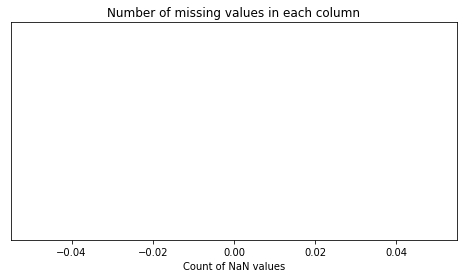

In [2]:
# Analysis of missing data
missing_data = data.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]
missing_data = missing_data.sort_values(by = 'missing_count')
ind = np.arange(missing_data.shape[0])

fig, ax = plt.subplots(figsize = (8,4))
rects = ax.barh(ind, missing_data.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_data.column_name.values, rotation = 'horizontal')
ax.set_xlabel("Count of NaN values")
ax.set_title("Number of missing values in each column")
plt.show()

No missing data, so we can continue onto EDA.

<a class="anchor" id="eda"></a>
# Exploratory Data Analysis
NB: This has been undertaken on the entire data set; although we should be aware that in real life, this may not be possible.

In [3]:
# Separation of variables into different data types
response = ['Default']

continuous = ['Balance',
              'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
              'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr']

categorical = ['Sex', 'Education', 'Marriage',
              'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr']

discrete = ['Age']

predictors = continuous + categorical + discrete

In [4]:
data.describe().round(2)

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


Nothing too interesting:

* NB: 1AUD ~ 20NT
* 81 different credit balance tiers
* education has 7 unique values but only 4 in the descrption?
* marriage has 4 uniques but only 3 in description?
* age range of 56 years
* PAY (payment status): -1 means paid fully for the corresponding bill, 0 no payment (yet), 1,2,...,8 means payment late
* Current bill and previous payment - so if fully paid, a bill in August will match the payment in September

### Assessing class balance

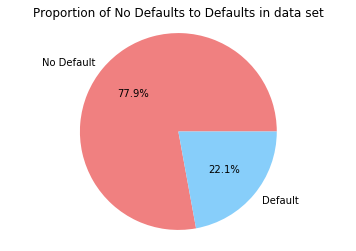

In [5]:
class_ratio = data['Default'].value_counts()

labels = 'No Default', 'Default'
sizes = [class_ratio[0], class_ratio[1]]
colors = ['lightcoral', 'lightskyblue']
 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%.1f%%')
 
plt.axis('equal')
plt.title('Proportion of No Defaults to Defaults in data set')

plt.show()

22.1% of responses are defaults - this is an imbalanced class problem

### Bar plots for categorical and discrete variables

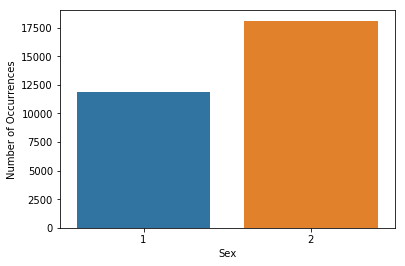

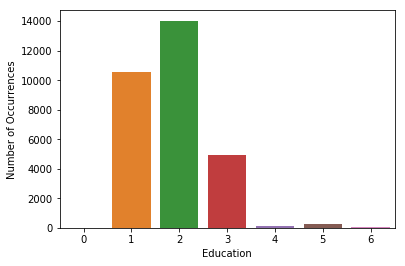

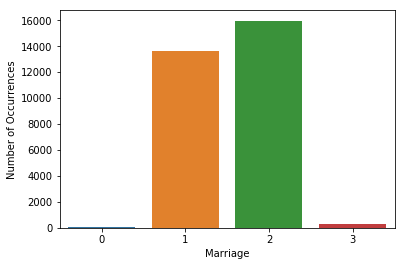

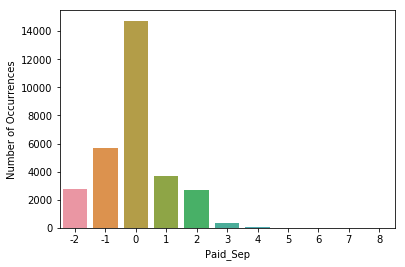

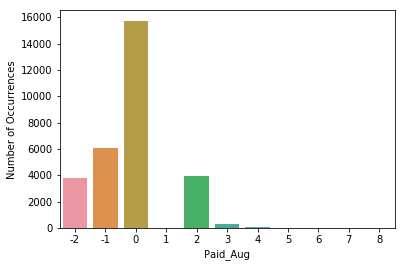

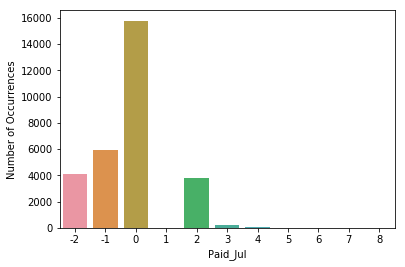

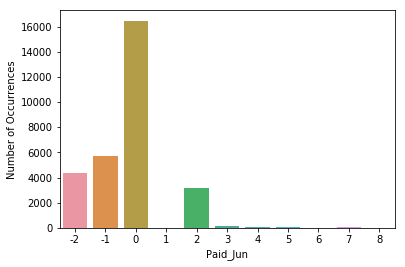

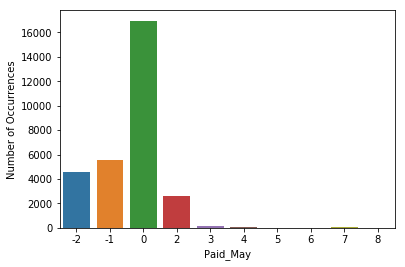

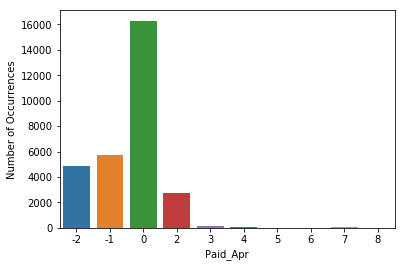

In [11]:
# Barplots for each categorical variable 
for item in categorical: 
    fig, ax = plt.subplots()
    item_count = data[item].value_counts()
    sns.barplot(item_count.index, item_count.values)
    plt.ylabel('Number of Occurrences')
    plt.xlabel(item)
    plt.show()

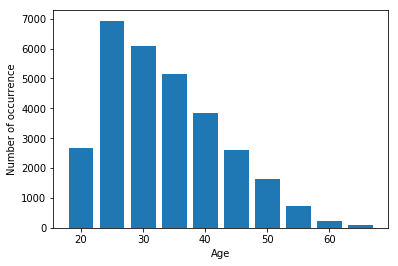

In [12]:
bins = [20,25,30,35,40,45,50,55,60,65,70]

plt.hist(data['Age'], bins, histtype='bar', rwidth=0.8, align='left', orientation='vertical')
plt.xlabel('Age')
plt.ylabel('Number of occurrence')
plt.show()

### Histograms for continuous variables

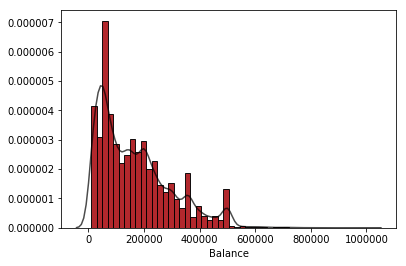

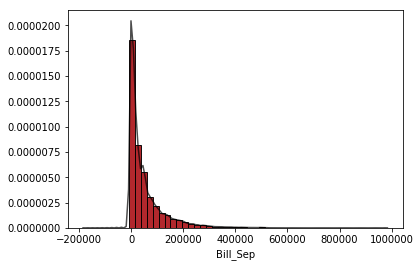

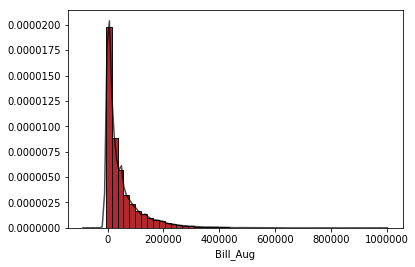

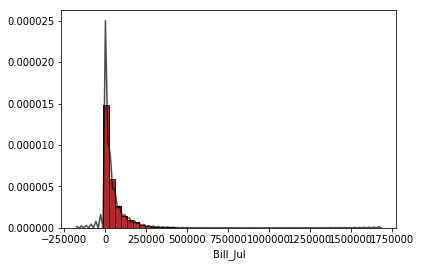

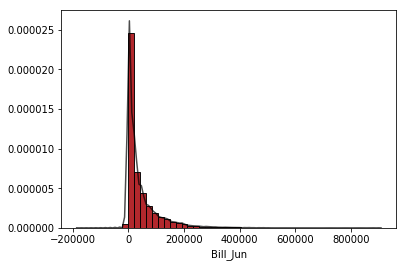

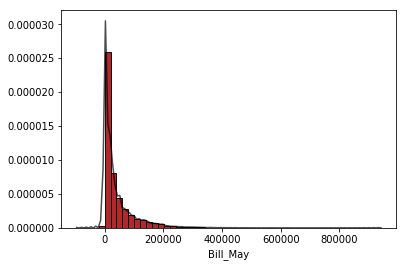

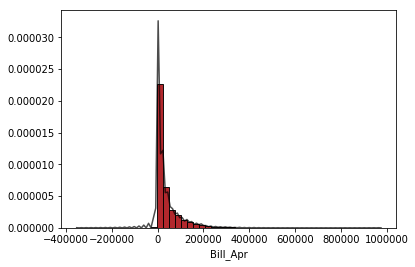

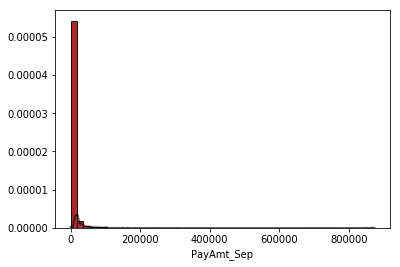

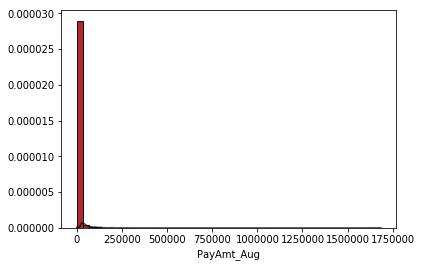

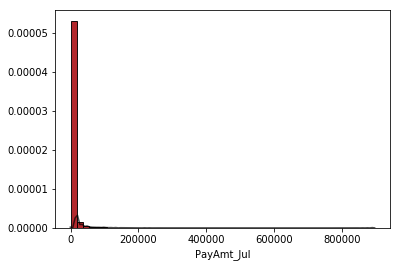

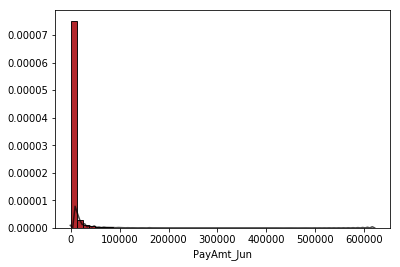

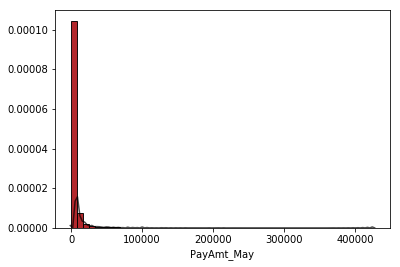

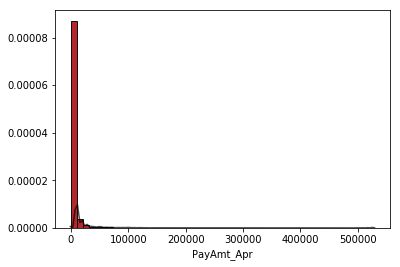

In [13]:
# Histograms for  continuous variables 
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Reds')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return plt.show()

for item in continuous:
    hist(data[item])

### Correlations amongst variables & pairplots for highly correlated

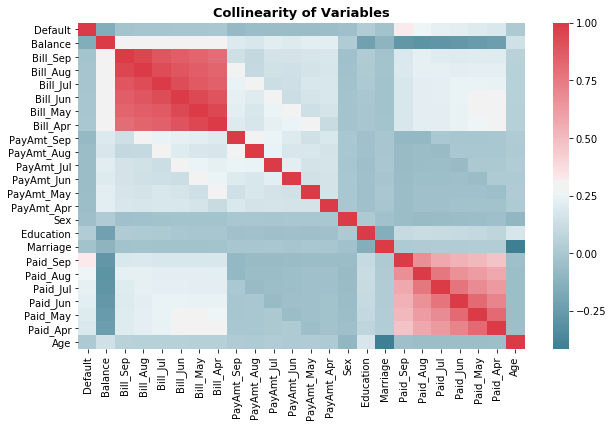

In [14]:
# Correlation matrix for all variables 
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns. diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[response+predictors].corr(), ax=ax, cmap=cmap)
ax.set_title('Collinearity of Variables', fontweight='bold', fontsize=13)
plt.show()

In [15]:
# List correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('Paid_Aug', 'Paid_Jul'),
 ('Paid_Jul', 'Paid_Jun'),
 ('Paid_Jun', 'Paid_May'),
 ('Paid_May', 'Paid_Apr'),
 ('Bill_Sep', 'Bill_Aug'),
 ('Bill_Sep', 'Bill_Jul'),
 ('Bill_Sep', 'Bill_Jun'),
 ('Bill_Sep', 'Bill_May'),
 ('Bill_Sep', 'Bill_Apr'),
 ('Bill_Aug', 'Bill_Jul'),
 ('Bill_Aug', 'Bill_Jun'),
 ('Bill_Aug', 'Bill_May'),
 ('Bill_Aug', 'Bill_Apr'),
 ('Bill_Jul', 'Bill_Jun'),
 ('Bill_Jul', 'Bill_May'),
 ('Bill_Jul', 'Bill_Apr'),
 ('Bill_Jun', 'Bill_May'),
 ('Bill_Jun', 'Bill_Apr'),
 ('Bill_May', 'Bill_Apr')]

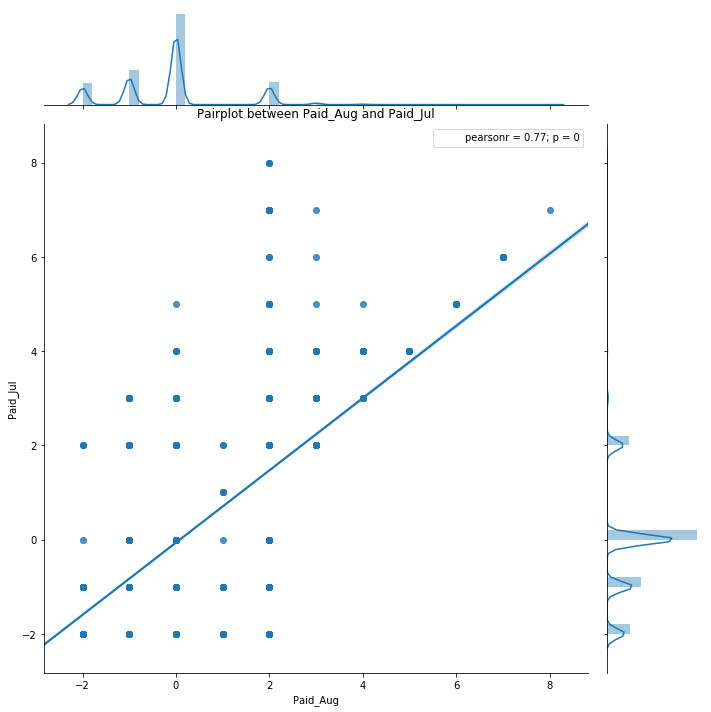

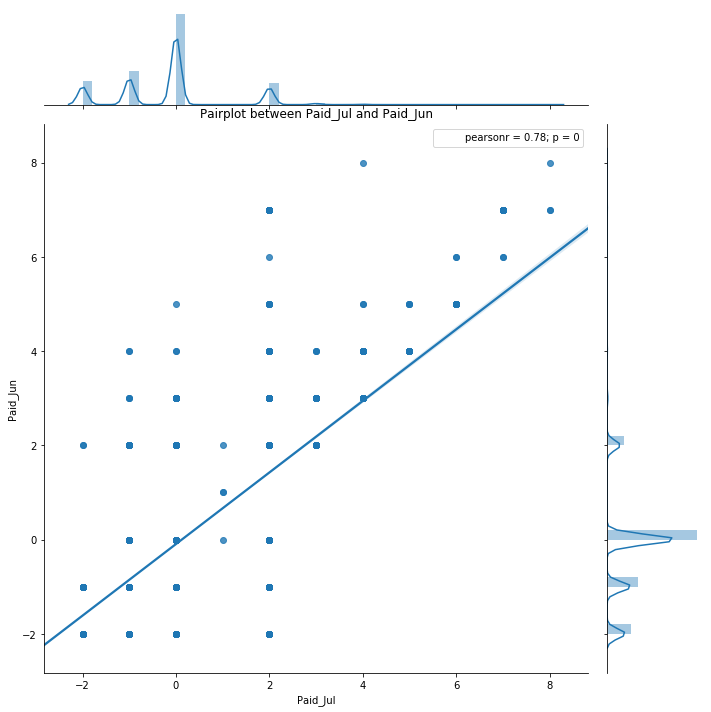

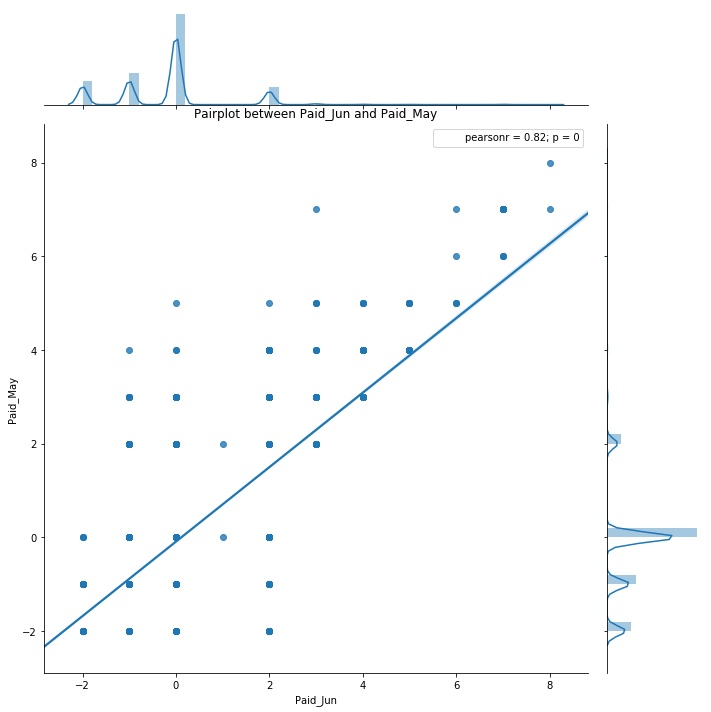

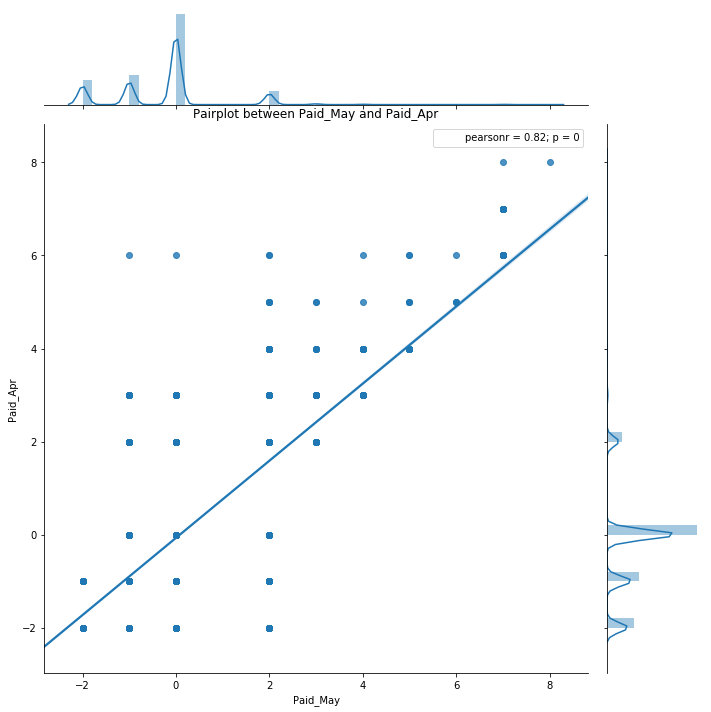

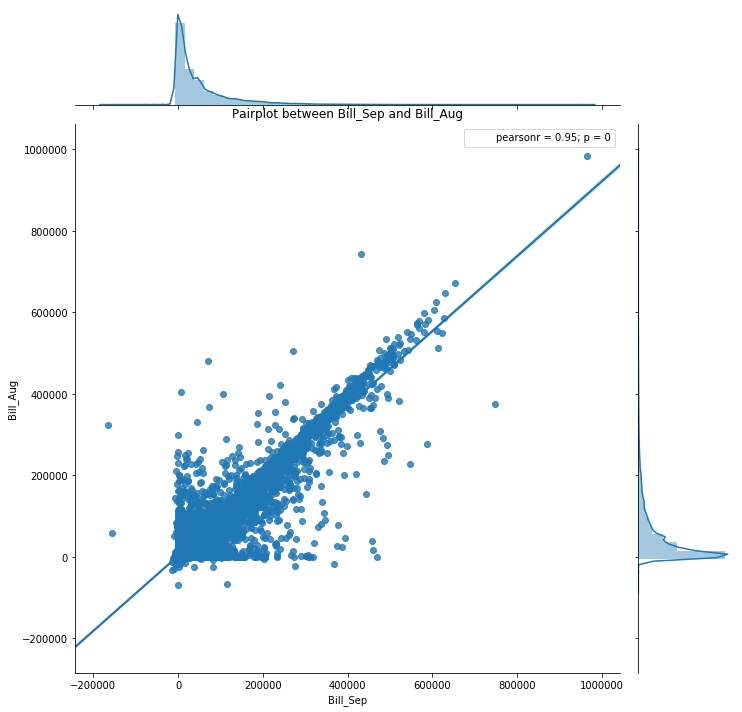

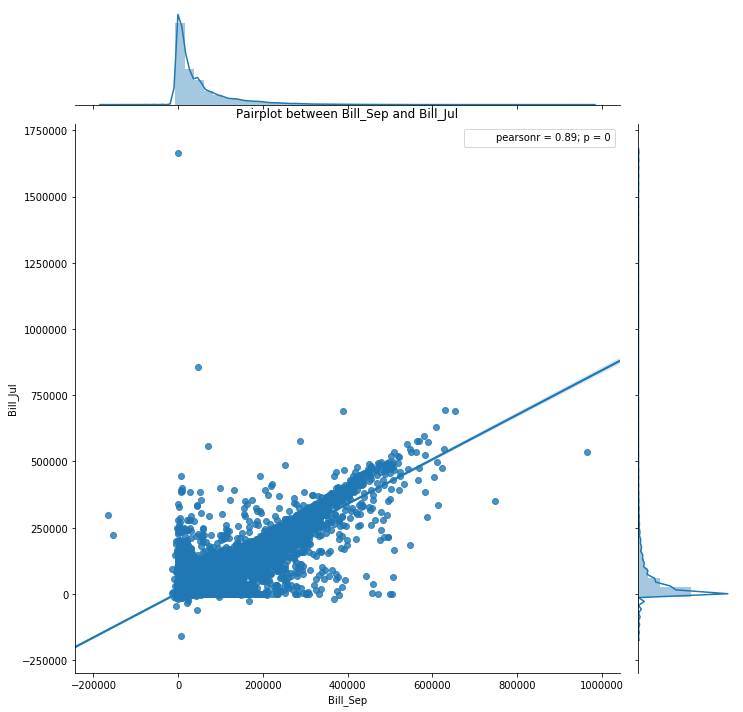

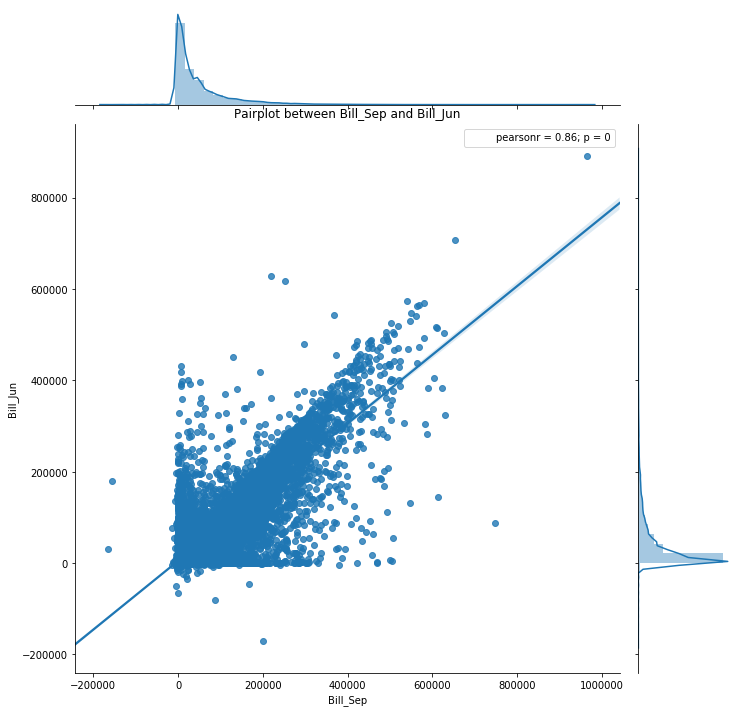

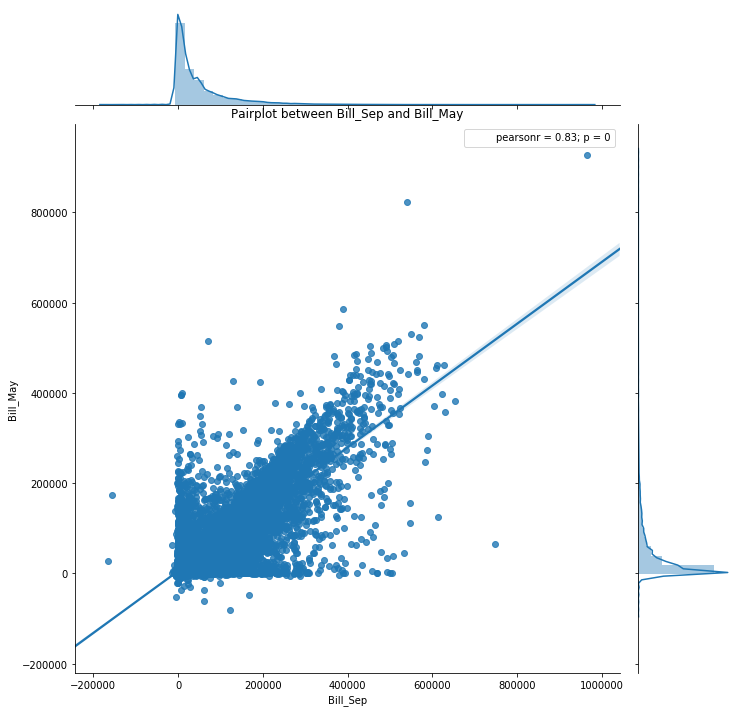

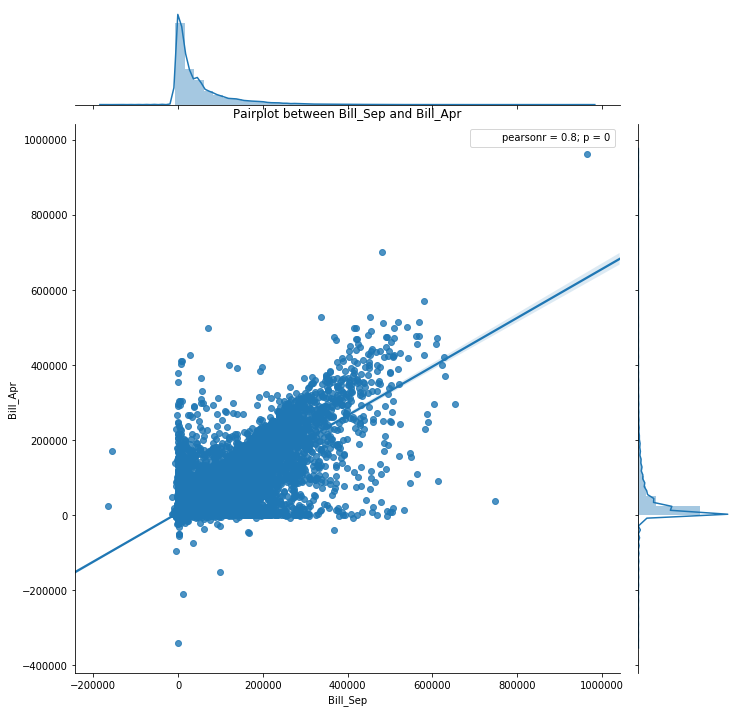

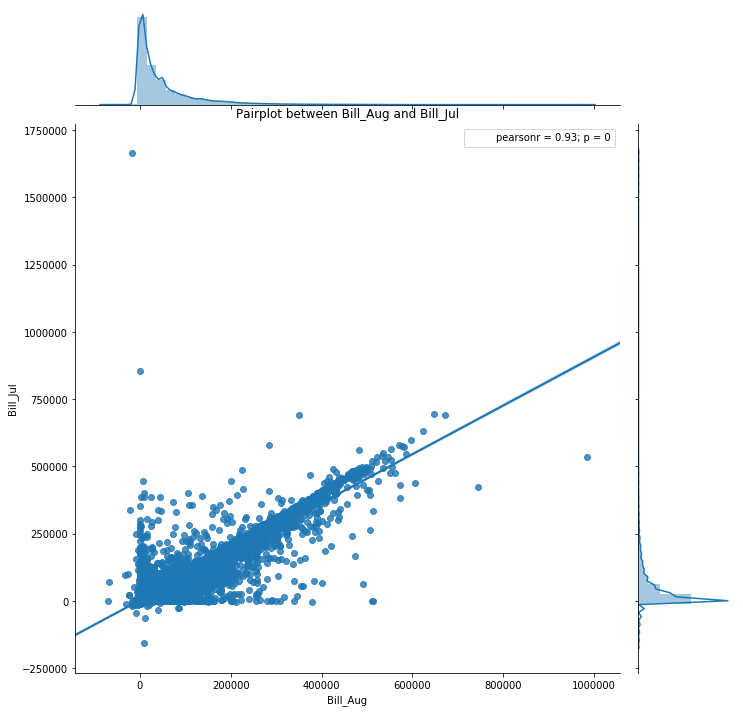

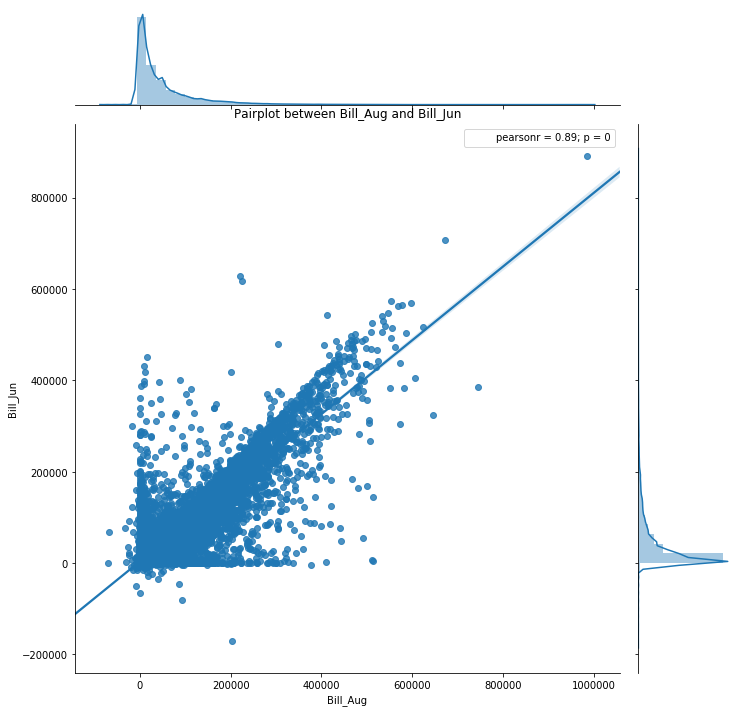

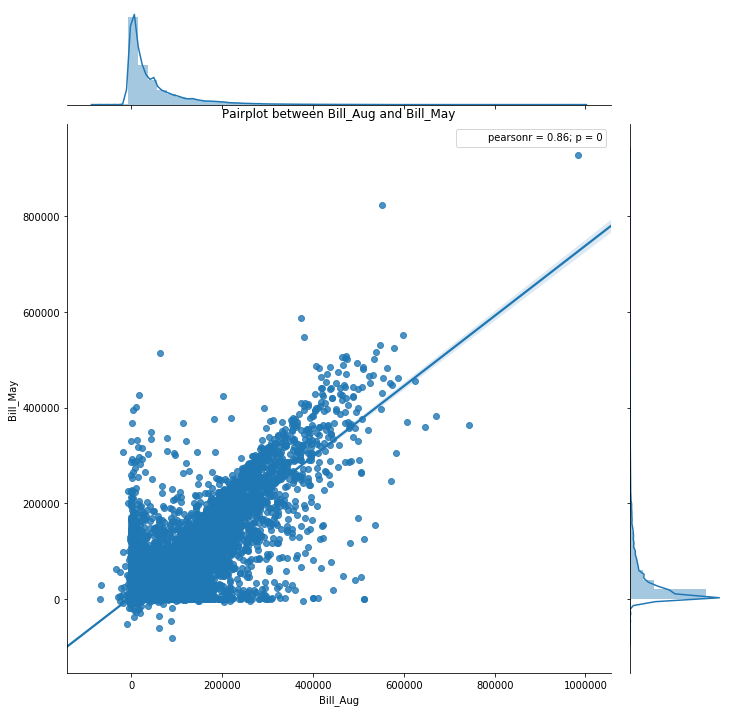

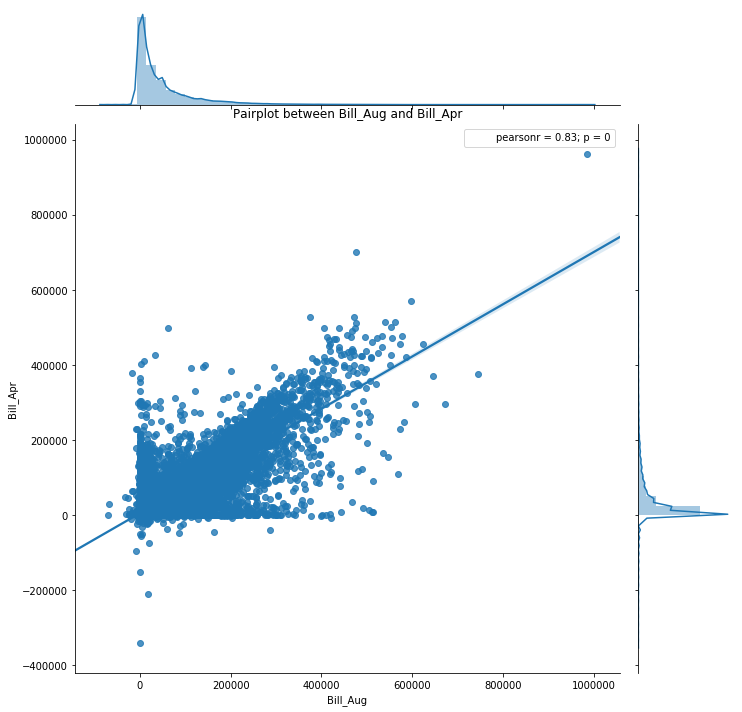

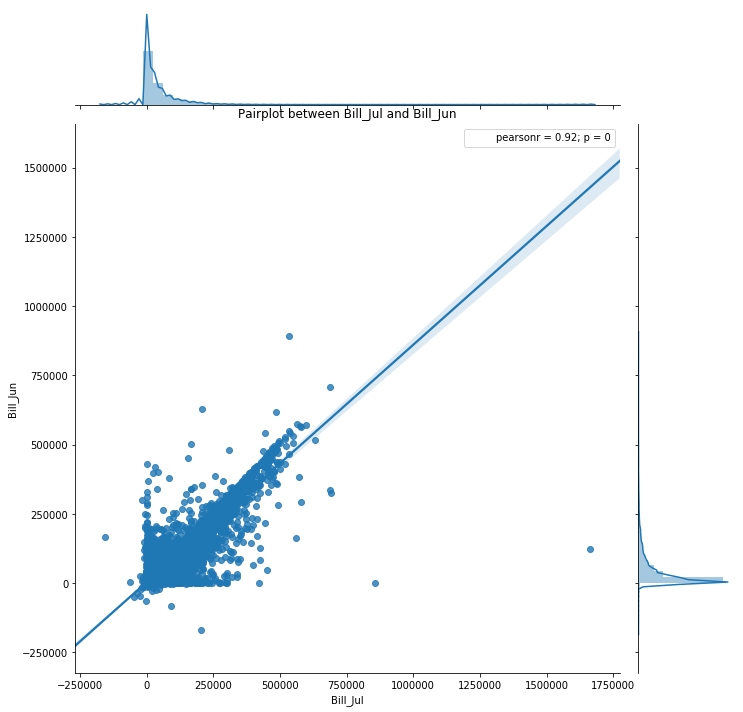

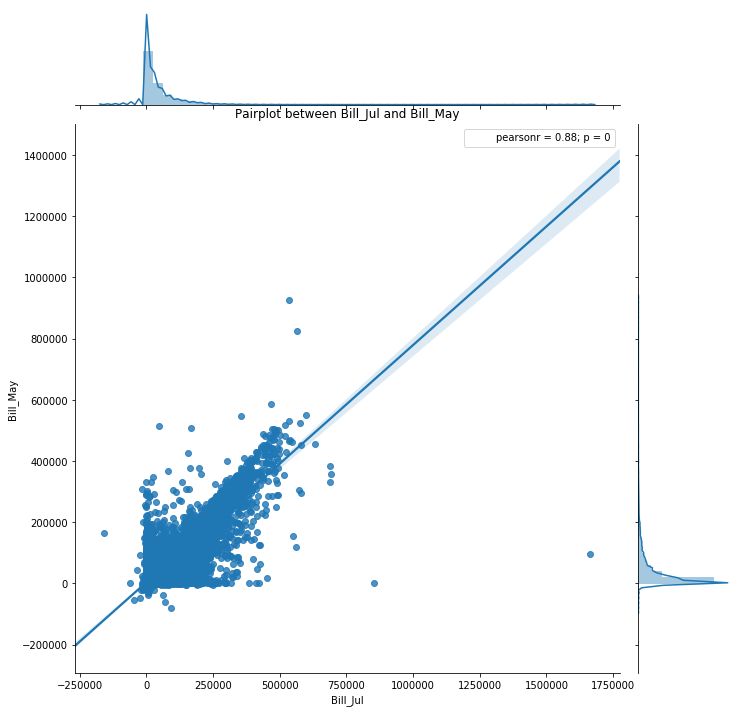

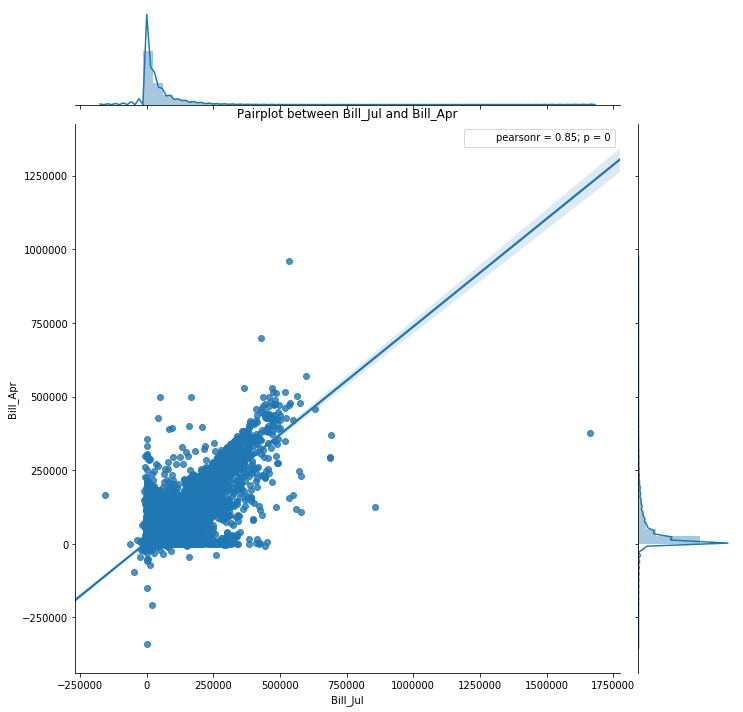

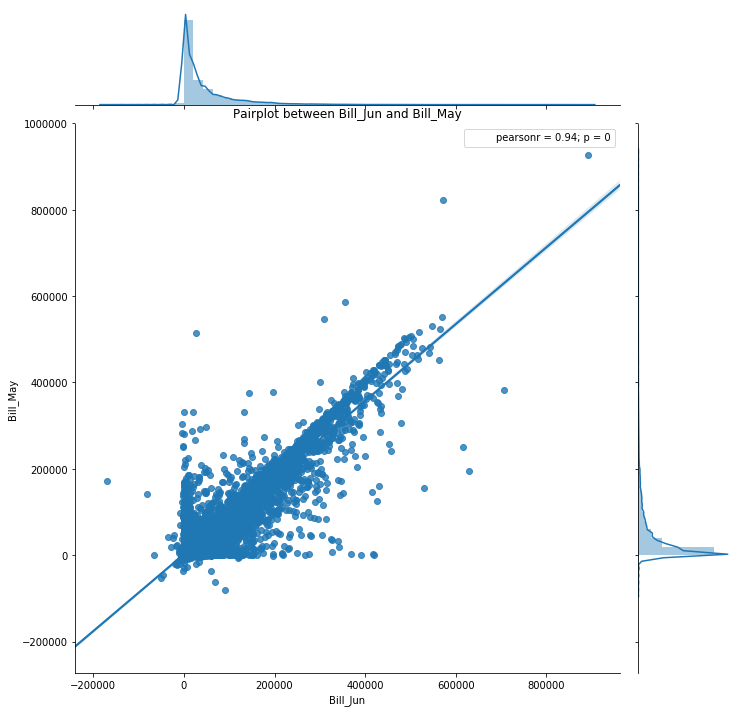

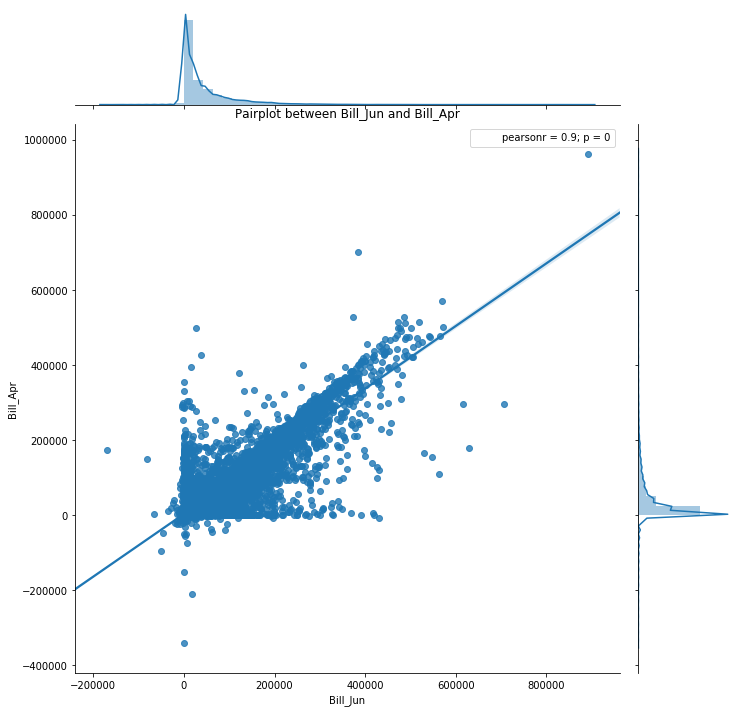

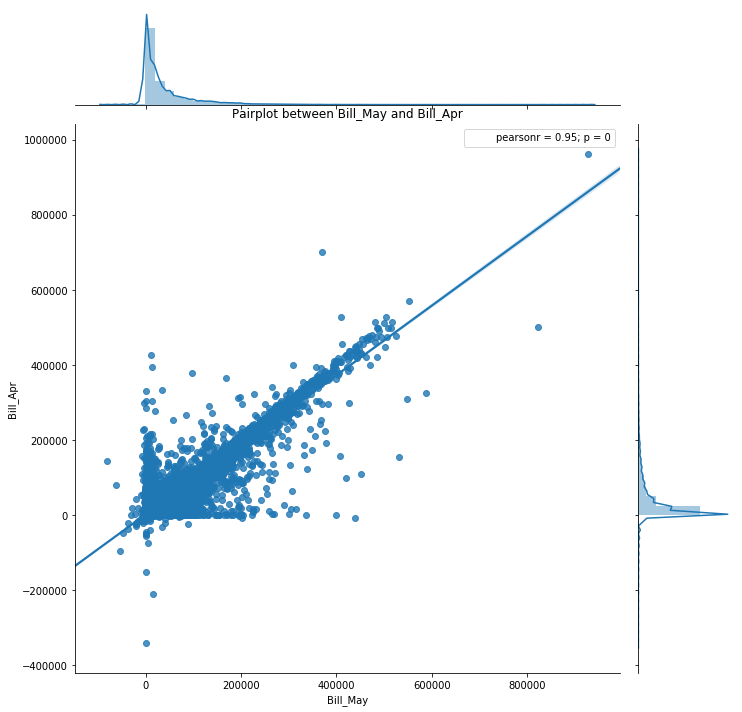

In [16]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

### Statistical tests (skewness, ANOVA, multicollinearity)

In [17]:
# Tests for skewness of data, to determine whether to scale with median or mean
from scipy.stats import skewtest
skewed = []
non_skewed = []

for i in continuous+discrete:
    p = skewtest(data[i], nan_policy='omit')[1] # calculates skewtest p_value (H0 = normally distributed)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)
        
print('Skewed variables are:\n{0}\n\nNon-skewed variables are:\n{1}'.format(skewed, non_skewed))

Skewed variables are:
['Balance', 'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr', 'Age']

Non-skewed variables are:
[]


Data all seems skewed, probably because of the zero-inflated data. 
Either transform with LOG or POWER

In [18]:
# Non-parametric Kruskal-Wallis ANOVA rank test - to determine class independence
from scipy.stats import kruskal
H = []
p = []

for i in categorical+discrete:
    h, pval = kruskal(*[data.loc[data[i]==v,'Default'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns=['H Stat'], index=categorical+discrete)
table['p values'] = pd.DataFrame(p, index=categorical+discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index=categorical+discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
Sex,47.90,0.0,True
Education,163.21,0.0,True
Marriage,35.66,0.0,True
Paid_Sep,5365.79,0.0,True
Paid_Aug,3474.35,0.0,True
Paid_Jul,2622.37,0.0,True
Paid_Jun,2341.39,0.0,True
Paid_May,2197.62,0.0,True
Paid_Apr,1886.77,0.0,True
Age,158.55,0.0,True


In [21]:
# Calculating VIF for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
pred = continuous + discrete

X = data[pred].as_matrix()

VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, 
                   columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


,SQRT(VIF)
Age,1.66
PayAmt_May,0.02
PayAmt_Apr,0.02
PayAmt_Sep,0.01
Bill_Jun,0.01
Bill_Jul,0.01
PayAmt_Jul,0.00
Bill_May,0.00
Balance,0.00
Bill_Sep,NaN


_Note: for some reason, my PC is wigging out... not getting same numbers as on a Mac_

### Cross-tabulations

In [22]:
# Cross-tabulation of Sex & Default
sex_default = pd.crosstab(data['Default'], data['Sex'], margins=True, normalize='columns')

# Default
row = {0: 'Non-default', 1: 'Default'}

# Sex
column = {1: 'Male', 2: 'Female'}

sex_default.rename(index=row, columns=column, inplace=True)
sex_default

Sex,Male,Female,All
Default,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212


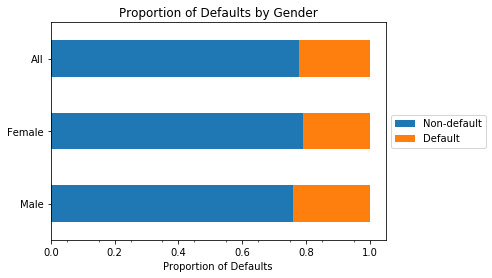

In [23]:
# Plot cross-tabulation
fig, ax = plt.subplots()

sex_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Gender')
plt.xlabel('Proportion of Defaults')
plt.show()

In [24]:
# Cross-tabulation of Education & Default
educ_default = pd.crosstab(data['Default'], data['Education'], margins=True, normalize='columns')

# Default
row = {0: 'Non-default', 1: 'Default', }
# Education
column = {1: 'Graduate school', 2: 'University', 3: 'High school', 4: 'Others', 0: 'NA(0)', 5: 'NA(5)', 6: 'NA(6)'}

educ_default.rename(index=row, columns=column, inplace=True)
educ_default

Education,NA(0),Graduate school,University,High school,Others,NA(5),NA(6),All
Default,,,,,,,,
Non-default,1.0,0.807652,0.762651,0.748424,0.943089,0.935714,0.843137,0.7788
Default,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863,0.2212


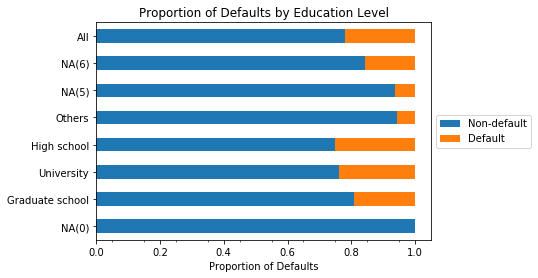

In [25]:
# Plot cross-tabulation
fig, ax = plt.subplots()

educ_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Education Level')
plt.xlabel('Proportion of Defaults')
plt.show()

In [26]:
# Cross-tabulation of Marriage & Default
marr_default = pd.crosstab(data['Default'], data['Marriage'], margins=True, normalize='columns')

# Default
row = {0: 'Non-default', 1: 'Default', }
# Marriage 
column = {1: 'Married', 2: 'Single', 3: 'Others', 0: 'NA'}

marr_default.rename(index=row, columns=column, inplace=True)
marr_default

Marriage,NA,Married,Single,Others,All
Default,,,,,
Non-default,0.907407,0.765283,0.790717,0.739938,0.7788
Default,0.092593,0.234717,0.209283,0.260062,0.2212


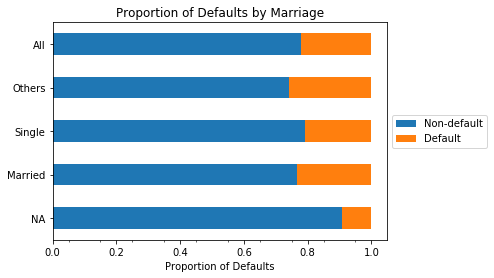

In [27]:
# Plot cross-tabulation
fig, ax = plt.subplots()

marr_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Marriage')
plt.xlabel('Proportion of Defaults')
plt.show()

<a class="anchor" id="baseline"></a>
# Baseline Model

### Splitting and scaling data
Before we progress, we must split out dataset into a test and train for evaluation. Note that we might be better off doing this before EDA, to simulate a real world scenario.

In [22]:
data = import_data()

from sklearn.model_selection import train_test_split

def split_data():
    # Labelling response and predictors
    global response, predictors
    response = ['Default']
    predictors = [x for x in list(data.columns) if x not in response]

    # Spliting data set
    y = data[response].copy()
    X = data[predictors].copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data()

In [4]:
from sklearn.preprocessing import StandardScaler

#def ScaleData():    
#    # Preparing parameters for scaling
#    scaler = StandardScaler().fit(X_train)
#    
#    # Scaling the data
#    X_train = scaler.transform(X_train)
#    X_test = scaler.transform(X_test)
#   
#    return X_train, X_test
#
#X_train, X_test = ScaleData()

Note that scaling has been temporarily commented out as the baseline model actually doesn't perform better when using l1 penalty, as we are specifying below)

However, for l2 penalty, scaling leads to the results we get from l1 penalty without scaling. This makes sense, as l2 (ridge) works "better when predictors are of similar magnitude" (QBUS3820), which is not the case here.

Further, **not scaling the data is necessary** for the tweaks that are undertaken below for dealing with the class imbalance.

**THUS, PROBABLY BEST TO MOVE THIS TO THE END FEATURE ENGINEERING**

### Baseline model with logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='l1')

logit.fit(X_train, np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluation

In [6]:
# Score against test set
accuracy = logit.score(X_test, np.ravel(y_test))

print('Accuracy:', accuracy.round(3))

Accuracy: 0.81


Here, we use the test dataset for validation and assume hat this is given data (as a pose to unseen real world data)

In [7]:
# SEE MODEL EVALUATION BELOW FOR MORE UP TO DATE CODE
from sklearn.model_selection import cross_val_score

models = [logit]
row = ['Logistic']
col = ['accuracy', 'roc_auc', 'f1'] #f1 is the weighted average between precision and recall

cv_results = pd.DataFrame(0.0, columns=col, index=row)
n=0
for i in models:
    m=0
    for j in range(len(col)):
        score = cross_val_score(i, X_train, np.ravel(y_train), cv=5, scoring=col[j])
        cv_results.iloc[n,m] = np.mean(score)
        m+=1
    n+=1
    
cv_results.round(3)

,accuracy,roc_auc,f1
Logistic,0.81,0.721,0.361


Alternative, we treat the test dataset as unseen and use CV instead... And then we can use the test dataset for our FINAL model at the very end?

### ROC curve and AUC
NB: These are all calculated with the test set, not with cross-validation

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [9]:
# AUC calculation
y_score = logit.fit(X_train, np.ravel(y_train)).decision_function(X_test)

roc_auc = roc_auc_score(y_test, y_score)

print('AUC:', roc_auc.round(3))

AUC: 0.727


In [10]:
# ALTERNATIVE AUC calculation
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

print('AUC:', roc_auc.round(3))

AUC: 0.727


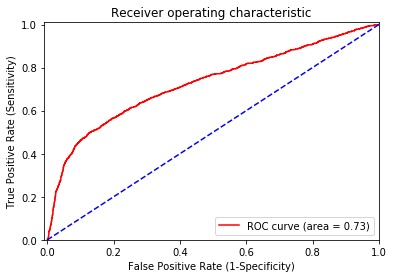

In [11]:
# ROC curve
plt.figure()

plt.plot(fpr, tpr, color='red',
         label='ROC curve (area = {})'.format(roc_auc.round(2)))

plt.plot([0, 1], [0, 1], color='blue', linestyle='--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

Recall that we want to maximise the AUC

### Confusion matrix

In [12]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = logit.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[4549  138]
 [1003  310]]


In [13]:
import itertools

# Based off http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Truth')
    plt.xlabel('Predicted')
    plt.tight_layout()

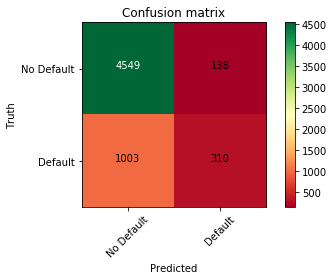

In [14]:
class_names = ['No Default','Default']

plot_confusion_matrix(cnf_matrix, classes=class_names, cmap=plt.cm.RdYlGn,
                      title='Confusion matrix')
plt.show()

In [15]:
print('TN:',tn)
print('FP:',fp)
print('FN:',fn)
print('TP:',tp)

# H0: customer will default
# H1: customer will not default

# TP: not rejecting true H0 (predict default when H0)
# TN: rejecting false H0 (predict no default when H1

TN: 4549
FP: 138
FN: 1003
TP: 310


### Other metrics

In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy = (tp+tn)/(tn+fp+fn+tp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print('Accuracy:', accuracy.round(3))
print('Sensitivity (Recall):', sensitivity.round(3))
print('Specificity:', specificity.round(3))

Accuracy: 0.81
Sensitivity (Recall): 0.236
Specificity: 0.971


23% accurate in identifying 'defaulters' as defaulting

97% accurate in correctly measuring 'non-defaulters' as not defaulting

Further, we aren't doing much better than guessing... 0.81% versus a dataset with 78% majority class.

### Hyperparameter tuning with CV
NB: This code is going to be more applicable for the modelling below, as we are not expected to really tune much for the baseline model.

In [18]:
from sklearn.model_selection import GridSearchCV

estimator = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2']
}

score = 'roc_auc'

model_search = GridSearchCV(estimator, param_grid, scoring=score, cv=5)

model_search.fit(X_train, np.ravel(y_train))

model = model_search.best_estimator_

print('Best parameters:', model_search.best_params_)

Best parameters: {'penalty': 'l1'}


No surprise, but l1 penalty is the best.

<a class="anchor" id="feature"></a>
# Feature Engineering

### Dealing with imbalanced classes

In [19]:
train = X_train.join(y_train)
train_majority = train[train['Default']==0]
train_minority = train[train['Default']==1]

Rejoining the split X and y from test_train_split earlier, and then splitting up based on classes

In [20]:
n_majority = train_majority['Default'].count()
n_minority = train_minority['Default'].count()

print('No Defaults:', n_majority)
print('Defaults:', n_minority)

No Defaults: 18677
Defaults: 5323


Clearly, at least in the train set that we split, there are significnatly fewer Default reponses -- this is a class imbalance problem that we must deal with (either via **upsampling the defaults**, or **downsamping the no defaults**)

**Upsampling**: may lead to overfitting due to replications of the minority class, whereas;

**Downsampling**: may lead to bias due to discarding potentially useful info

A third, alternative method we can use is called SMOTE (synthetic minority over-sampling technique) -- link for more info: http://rikunert.com/SMOTE_explained

In [23]:
from sklearn.utils import resample

# Downsampling majority class
train_majority_down = resample(train_majority, replace=False, n_samples=n_minority, random_state=42)
train_down = pd.concat([train_minority, train_majority_down])
X_down = train_down[predictors].copy()
y_down = train_down[response].copy()

# Upsampling minority class
train_minority_up = resample(train_minority, replace=True, n_samples=n_majority, random_state=42)
train_up = pd.concat([train_majority, train_minority_up])
X_up = train_up[predictors].copy()
y_up = train_up[response].copy()

In the first cell, we are downsampling the majority class (no defaults) by essentially resampling without replacement. This allow us to build a new dataset essentially,  only up to the same number of samples as the minority class (5323)

In the second cell, we are upsampling the minority class (defaults) by resampling with replacement, up to the same number of samples as no defaults (18677)

In [24]:
#conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, ratio='auto')
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, np.ravel(y_train))

This method uses the SMOTE algorithm as highlighted above. Note that there are many parameters that I've left as default, for simplicty now - but some things to explore are the k neighbours and SVM.

### Running logistic regression on the rebalanced classes

In [25]:
%%time
logit_down = LogisticRegression(penalty='l1')
logit_down.fit(X_down, np.ravel(y_down))

Wall time: 263 ms


In [26]:
%%time
logit_up = LogisticRegression(penalty='l1')
logit_up.fit(X_up, np.ravel(y_up))

# Note: this took noticably longer to run, due to the upsizing

Wall time: 967 ms


In [27]:
%%time
logit_SMOTE = LogisticRegression(penalty='l1')
logit_SMOTE.fit(X_SMOTE, np.ravel(y_SMOTE))

Wall time: 997 ms


In [28]:
# Evaluation of baseline with rebalanced classes
col = ['AUC', 'Accuracy', 'Sensitivity', 'Specificity']
row = ['Logistic', 'Downsampled Logit', 'Upsampled Logit', 'SMOTE Logit']
models = [logit, logit_down, logit_up, logit_SMOTE]

data = [[X_train, y_train],
        [X_up, y_up],
        [X_down, y_down],
        [X_SMOTE, y_SMOTE]]

results = pd.DataFrame(0.0, columns=col, index=row)
#plt.figure()
n=0
for i in models:
    y_pred = i.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    y_score = i.fit(data[n][0], np.ravel(data[n][1])).decision_function(X_test) # Calculates the score used for the AUC below
    
    results.iloc[n,0] = roc_auc_score(y_test, y_score)
    results.iloc[n,1] = (tp+tn)/(tn+fp+fn+tp)
    results.iloc[n,2] = tp/(tp+fn)
    results.iloc[n,3] = tn/(tn+fp)
        
    #class_names = ['No Default','Default']
    #plot_confusion_matrix(cnf_matrix, classes=class_names, cmap=plt.cm.RdYlGn,
    #                  title='Confusion matrix for: '+str(row[n]))
    #plt.show()
    
    n+=1
    
results.round(3)

,AUC,Accuracy,Sensitivity,Specificity
Logistic,0.727,0.810,0.236,0.971
Downsampled Logit,0.729,0.698,0.641,0.714
Upsampled Logit,0.728,0.691,0.645,0.704
SMOTE Logit,0.729,0.700,0.625,0.721


~~We see no improvements in the accuracy, however AUC remains constant, and we have dramatically increased Specificity (True Negatives - correct detection of defaults) relative to the trade-off we have against Sensitvity (True Positives).~~

~~This may be  useful in a business context, where the cost of NOT DETECTING a default substantially outweighs the profits from several correct detections of non-defaults (i.e. True Positives); that is, we may be able to accept this decrease in Sensitivity, to increase our Specificity.~~

~~Further, there are  **no change in ROC curve** despite changing the class balances.~~

Not sure what's happened but numbers are different now?

If we make our objective function / decision rule something like **maximise profit** or **minimise costs**, as a function of sensitivity and specificity, SMOTE looks best so far as AUC is basically the same as baseline, but we've improved sensitivity without affecting specificity too much.

### Transforming continuous data due to skewness

In [ ]:
import scipy
#for i in continuous:
#    scipy.stats.boxcox(data[i])[0]
#    hist(data[i])
    
# Box Cox transformation won't work for negative values - figure this out later

In [ ]:
########################################

In [ ]:
# more feature engineering to be added #

In [ ]:
########################################

<a class="anchor" id="modelling"></a>
# Modelling
1. [LDA/QDA](#ldaqda)
2. [SVMs](#svm)
3. [SGD classification](#sgd)
4. [Gaussian process classification](#gpc)
5. [Naive Bayes](#nb)
6. [Nearest neighbours classification](#knn)
7. [Classification decision trees](#tree)
8. [Bagging](#bag)
9. [Random forest](#rf)
10. AdaBoost
11. Gradient tree boosting
12. Neural nets

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

<a class="anchor" id="ldaqda"></a>
### LDA/QDA

In [91]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, np.ravel(y_train))

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, np.ravel(y_train))

lda_accuracy = lda.score(X_test, np.ravel(y_test))
qda_accuracy = qda.score(X_test, np.ravel(y_test))

print('LDA accuracy:', lda_accuracy.round(3))
print('QDA accuracy:', qda_accuracy.round(3))

LDA accuracy: 0.809
QDA accuracy: 0.512


May need to tune parameters.

<a class="anchor" id="svm"></a>
### Support vector machines
This takes a lot of time... probably worth adding the argument, class_weight in the fit method due to the class imbalance. See these links:
* http://scikit-learn.org/stable/modules/svm.html#classification
* https://stats.stackexchange.com/questions/24959/a-priori-selection-of-svm-class-weights

In [92]:
%%time
svc = SVC(random_state=42)

svc.fit(X_train, np.ravel(y_train))

accuracy = svc.score(X_test, np.ravel(y_test))

print('SVC accuracy:', accuracy.round(3))

SVC accuracy: 0.781
Wall time: 3min 35s


<a class="anchor" id="sgd"></a>
### Stochastic gradient descent
Note: this is essentially a logistic regression or SVM (depending on the loss specification), which uses SGD learning
* http://scikit-learn.org/stable/modules/sgd.html
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [93]:
%%time
sgd = SGDClassifier(loss="log", penalty="l1",
                    max_iter=1000, random_state=42) # Using logistic reg, and l1 penalty

sgd.fit(X_train, np.ravel(y_train))

accuracy = sgd.score(X_test, np.ravel(y_test))

print('SGD accuracy:', accuracy.round(3))

SGD accuracy: 0.771
Wall time: 9.28 s


<a class="anchor" id="gpc"></a>
### Gaussian process classification
http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html

Based on this book: http://www.gaussianprocess.org/gpml/chapters/RW.pdf

In [ ]:
%%time
### WARNING: TAKES FOREVER TO RUN!!!

kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

gpc.fit(X_train, np.ravel(y_train))

accuracy = gpc.score(X_test, np.ravel(y_test))

print('GPC accuracy:', accuracy.round(3))

<a class="anchor" id="nb"></a>
### Naive Bayes

In [94]:
%%time
nb = GaussianNB(priors=[0.8,0.2])

nb.fit(X_train, np.ravel(y_train))

accuracy = nb.score(X_test, np.ravel(y_test))

print('NB accuracy:', accuracy.round(3))

NB accuracy: 0.39
Wall time: 25.9 ms


GaussianNB: likelihood of the features is assumed to be Gaussian

~~ComplementNB: adaptation of the standard multinomial naive Bayes algorithm, suited for imbalanced data sets~~

<a class="anchor" id="knn"></a>
### Nearest neighbours classification

In [102]:
%%time
estimator = KNeighborsClassifier() 

param_grid = {
    'n_neighbors': np.arange(1, 10)
}

score = 'roc_auc'

model_search = GridSearchCV(estimator, param_grid, scoring=score, cv=5)

model_search.fit(X_train, np.ravel(y_train))

knn = model_search.best_estimator_

accuracy = knn.score(X_test, np.ravel(y_test))

print('Best parameters:', model_search.best_params_)
print('KNN accuracy:', accuracy.round(3))

Best parameters: {'n_neighbors': 9}
KNN accuracy: 0.769
Wall time: 2min 3s


Can increase range to 50, but comp time is a big factor

<a class="anchor" id="tree"></a>
### Classification decision trees

In [103]:
%%time
estimator = DecisionTreeClassifier(criterion='entropy', random_state=42)

param_grid = {
    'max_depth': np.arange(1,10),
    'min_samples_leaf': [1, 5, 10, 20, 50]
}

score = 'roc_auc'

model_search = GridSearchCV(estimator, param_grid, scoring=score, cv=5)

model_search.fit(X_train, np.ravel(y_train))

tree = model_search.best_estimator_

accuracy = tree.score(X_test, np.ravel(y_test))

print('Best parameters:', model_search.best_params_)
print('Tree accuracy:', accuracy.round(3))

Best parameters: {'max_depth': 6, 'min_samples_leaf': 50}
Tree accuracy: 0.82
Wall time: 39.7 s


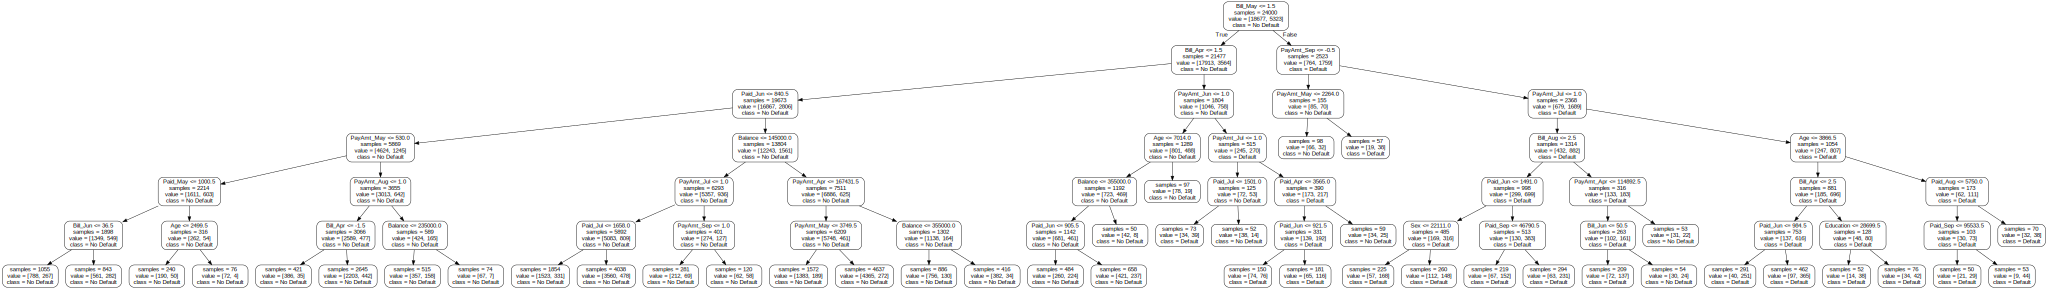

In [75]:
#conda install -c anaconda graphviz
#conda install graphviz
#conda install python-graphviz
import graphviz
from sklearn.tree import export_graphviz

tree_graph = export_graphviz(tree, out_file=None,
                             feature_names=predictors, impurity=False,
                             class_names=['No Default','Default'], rounded=True) 

graph = graphviz.Source(tree_graph)
#graph.render('tree')

graph

<a class="anchor" id="bag"></a>
### Bagging

In [98]:
%%time
bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                        n_estimators=100, random_state=42)

bag.fit(X_train, np.ravel(y_train))

accuracy = bag.score(X_test, np.ravel(y_test))

print('Bag accuracy:', accuracy.round(3))

Bag accuracy: 0.814
Wall time: 43.7 s


<a class="anchor" id="rf"></a>
### Random forest

In [99]:
%%time
estimator = RandomForestClassifier(criterion='entropy', # can also consider criterion='gini'
                                   n_estimators=100, random_state=42)

param_grid = {
    'max_features': np.arange(1, X_train.shape[1], 5), # the 5 splits it into every 5
    'min_samples_leaf': [1, 5, 10, 20, 50]    
}

score = 'roc_auc'

model_search = RandomizedSearchCV(estimator, param_grid, scoring=score,
                                  cv=5, n_iter=10, random_state=42)
model_search.fit(X_train, np.ravel(y_train))
rf = model_search.best_estimator_

accuracy = rf.score(X_test, np.ravel(y_test))

print('Best parameters by randmised search:', model_search.best_params_)
print('RF accuracy:', accuracy.round(3))

Best parameters by randmised search: {'min_samples_leaf': 50, 'max_features': 6}
RF accuracy: 0.821
Wall time: 11min 8s


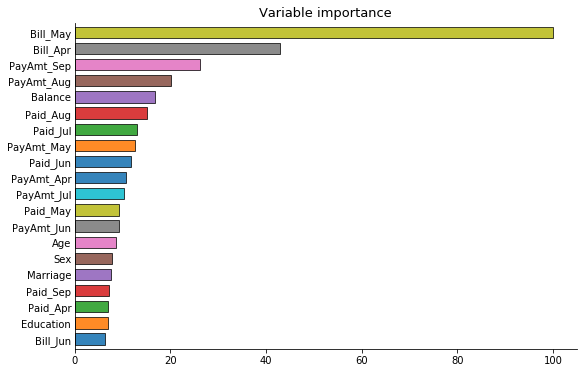

In [100]:
from statlearning import plot_feature_importance
plot_feature_importance(rf, predictors)
plt.show()

### SKLearn Boosting, XGBoost, LightGBM, AdaBoost

In [101]:
# Scott to add

## Evaluation

In [181]:
# This is a scorer for specificity as none currently exists in sklearn
from sklearn.metrics import make_scorer

def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn/(tn+fp)
    return specificity

specificity_scorer = make_scorer(specificity, greater_is_better=True)

In [182]:
from sklearn.model_selection import cross_val_score

def score(model, X, y):
    '''
    Function to return CV evaluation metrics for the given model
    '''
    
    scoring = ['accuracy', 'roc_auc', 'recall', specificity_scorer]
    scores = []
    
    for i in scoring:
        score = np.mean(cross_val_score(model, X, y,
                                        scoring=i, cv=5))
        
        scores.append(score)
    
    return scores

In [187]:
# Builds the evaluation table with the specified metrics
models = [logit]
row = ['Logistic']
col = ['Accuracy', 'AUC', 'Sensitivity', 'Specificity']

cv_results = pd.DataFrame(0.0, columns=col, index=row)

n=0
for i in models:
    scores = score(i, X_train, np.ravel(y_train))
    cv_results.iloc[n,0] = scores[0]
    cv_results.iloc[n,1] = scores[1]
    cv_results.iloc[n,2] = scores[2]
    cv_results.iloc[n,3] = scores[3]
    n+=1
    
cv_results.round(3)

,Accuracy,AUC,Sensitivity,Specificity
Logistic,0.81,0.721,0.242,0.972


Low sensitivity for Logistic due to the many false negatives.

NB: add more models as necessary. Also consider TPR and TNR as metrics.

In [ ]:
# Plot ROC curves
from statlearning import plot_roc_curves

with sns.color_palette(crayon):
    fig, ax = plot_roc_curves(y_test, y_prob, labels=pd.Series(rows))
    plt.show()